In [1]:
import scanpy as sc

In [2]:
import decoupler as dc

In [3]:
adata = sc.read_h5ad("../../../40_tables/40_single-cell-sorted-cd8/40_gex_surface_prot/adata_neighbors.h5ad")

In [4]:
path = "../../../40_tables/40_single-cell-sorted-cd8/40_gex_surface_prot/pseudobulk/"

In [5]:
adata.obs

,adata_name,condition,batch_id,sample_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mito,...,joint_leiden_15,cell_type,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,mt_outlier,cell_type2,leiden,louvain
AAACCTGAGAGCCTAG-1_10mix_ICI1,adata_10mix_ICI1,10mix,ICI1,10mix_ICI1,2517,7.831220,2358.187500,7.766073,3.435101,70.0,...,17,SLEC_Effector,18.138842,2.951720,0.769186,False,False,SLEC5,5,3
AAACCTGAGATGTGGC-1_10mix_ICI1,adata_10mix_ICI1,10mix,ICI1,10mix_ICI1,3026,8.015327,2281.922119,7.733212,3.774262,150.0,...,18,SLEC_Effector,20.714182,3.077965,0.907751,False,False,SLEC5,13,0
AAACCTGAGGCTCTTA-1_10mix_ICI1,adata_10mix_ICI1,10mix,ICI1,10mix_ICI1,1475,7.297091,1878.679443,7.538857,4.629525,100.0,...,0,MPEC_Progenitor,27.532475,3.351043,1.465523,False,False,MPEC1,8,5
AAACCTGAGGGCACTA-1_10mix_ICI1,adata_10mix_ICI1,10mix,ICI1,10mix_ICI1,2213,7.702556,2028.876221,7.615730,4.201432,72.0,...,1,SLEC_Ifn,17.325451,2.908291,0.853943,False,False,SLEC4,6,0
AAACCTGAGGGCTTGA-1_10mix_ICI1,adata_10mix_ICI1,10mix,ICI1,10mix_ICI1,1926,7.563720,1843.050049,7.519720,4.766107,70.0,...,1,MPEC_Intermediate,18.567251,2.973857,1.007420,False,False,MPEC2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCACGCATA-1_GF_ICI2_plus,adata_GF_ICI2_plus,GF,ICI2,GF_ICI2_plus,2699,7.901007,2290.522461,7.736972,3.581109,175.0,...,6,SLEC_Ifn,23.063448,3.180694,1.006908,False,False,SLEC4,2,7
TTTGTCATCCAGAGGA-1_GF_ICI2_plus,adata_GF_ICI2_plus,GF,ICI2,GF_ICI2_plus,2265,7.725771,2183.058350,7.688940,3.920776,119.0,...,2,SLEC_Ifn,20.193724,3.053705,0.925020,False,False,SLEC4,2,1
TTTGTCATCCCTTGCA-1_GF_ICI2_plus,adata_GF_ICI2_plus,GF,ICI2,GF_ICI2_plus,2113,7.656337,2171.315674,7.683549,3.845676,136.0,...,7,SLEC_Effector,26.419720,3.311262,1.216761,False,False,SLEC5,0,3
TTTGTCATCTCTGTCG-1_GF_ICI2_plus,adata_GF_ICI2_plus,GF,ICI2,GF_ICI2_plus,2105,7.652546,2094.349121,7.647475,4.076508,170.0,...,5,SLEC_Progenitor,26.387711,3.310094,1.259948,False,False,SLEC2,7,0


In [9]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    adata,
    sample_col='condition',
    groups_col='cell_type',
    layer='counts',
     min_cells=10,
    min_counts=1000
)

In [10]:
pdata.obs

,condition,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,is_outlier,cell_type,outlier,mt_outlier,cell_type2,psbulk_n_cells,psbulk_counts
10mix_MPEC_Effector,10mix,0.0,0.0,0.0,False,MPEC_Effector,False,False,MPEC3,468.0,2793502.0
11mix_MPEC_Effector,11mix,0.0,0.0,0.0,False,MPEC_Effector,False,False,MPEC3,1415.0,9767436.0
GF_MPEC_Effector,GF,0.0,0.0,0.0,False,MPEC_Effector,False,False,MPEC3,1151.0,8908067.0
10mix_MPEC_Intermediate,10mix,0.0,0.0,0.0,False,MPEC_Intermediate,False,False,MPEC2,502.0,3644699.0
11mix_MPEC_Intermediate,11mix,0.0,0.0,0.0,False,MPEC_Intermediate,False,False,MPEC2,442.0,3462982.0
GF_MPEC_Intermediate,GF,0.0,0.0,0.0,False,MPEC_Intermediate,False,False,MPEC2,1424.0,12284221.0
10mix_MPEC_Progenitor,10mix,0.0,0.0,0.0,False,MPEC_Progenitor,False,False,MPEC1,1144.0,6127866.0
11mix_MPEC_Progenitor,11mix,0.0,0.0,0.0,False,MPEC_Progenitor,False,False,MPEC1,895.0,5358113.0
GF_MPEC_Progenitor,GF,0.0,0.0,0.0,False,MPEC_Progenitor,False,False,MPEC1,1470.0,10188931.0
10mix_SLEC_Effector,10mix,0.0,0.0,0.0,False,SLEC_Effector,False,False,SLEC5,3056.0,26825158.0


In [7]:
pdata_ifn = pdata[pdata.obs["cell_type"]=="SLEC_Ifn"].copy()

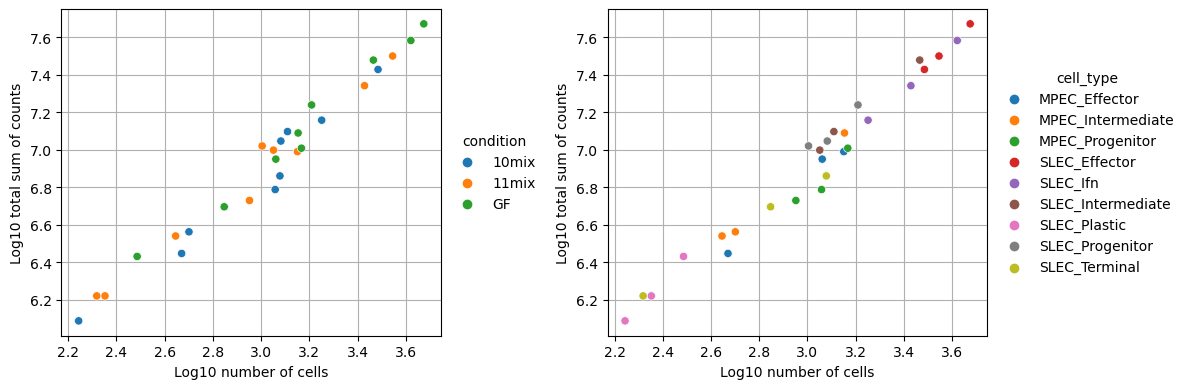

In [11]:
dc.plot_psbulk_samples(pdata, groupby=['condition', 'cell_type'], figsize=(12, 4))

In [9]:
pdata = pdata_ifn

In [10]:
pdata

AnnData object with n_obs × n_vars = 8 × 15819
    obs: 'adata_name', 'condition', 'batch_id', 'sample_id', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'is_outlier', 'cell_type', 'outlier', 'mt_outlier', 'cell_type2', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'psbulk_props'

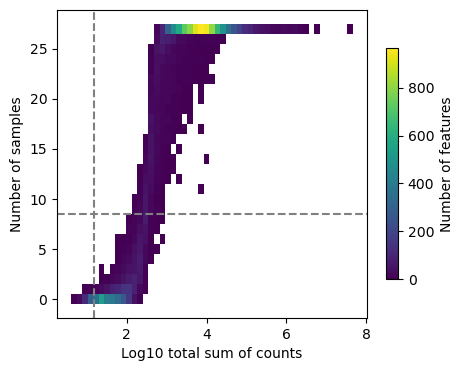

In [13]:
dc.plot_filter_by_expr(pdata, group='condition', min_count=10, min_total_count=15)

In [15]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(pdata, group='condition', min_count=10, min_total_count=15)

# Filter by these genes
pdata = pdata[:, genes].copy()
pdata

AnnData object with n_obs × n_vars = 27 × 11052
    obs: 'condition', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'is_outlier', 'cell_type', 'outlier', 'mt_outlier', 'cell_type2', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'psbulk_props'

In [16]:
pdata.layers["counts"] = pdata.X

In [17]:
scales_counts = sc.pp.normalize_total(pdata, target_sum=None, inplace=False)
# log1p transform
pdata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [18]:
pdata.obs

,condition,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,is_outlier,cell_type,outlier,mt_outlier,cell_type2,psbulk_n_cells,psbulk_counts
10mix_MPEC_Effector,10mix,0.0,0.0,0.0,False,MPEC_Effector,False,False,MPEC3,468.0,2793502.0
11mix_MPEC_Effector,11mix,0.0,0.0,0.0,False,MPEC_Effector,False,False,MPEC3,1415.0,9767436.0
GF_MPEC_Effector,GF,0.0,0.0,0.0,False,MPEC_Effector,False,False,MPEC3,1151.0,8908067.0
10mix_MPEC_Intermediate,10mix,0.0,0.0,0.0,False,MPEC_Intermediate,False,False,MPEC2,502.0,3644699.0
11mix_MPEC_Intermediate,11mix,0.0,0.0,0.0,False,MPEC_Intermediate,False,False,MPEC2,442.0,3462982.0
GF_MPEC_Intermediate,GF,0.0,0.0,0.0,False,MPEC_Intermediate,False,False,MPEC2,1424.0,12284221.0
10mix_MPEC_Progenitor,10mix,0.0,0.0,0.0,False,MPEC_Progenitor,False,False,MPEC1,1144.0,6127866.0
11mix_MPEC_Progenitor,11mix,0.0,0.0,0.0,False,MPEC_Progenitor,False,False,MPEC1,895.0,5358113.0
GF_MPEC_Progenitor,GF,0.0,0.0,0.0,False,MPEC_Progenitor,False,False,MPEC1,1470.0,10188931.0
10mix_SLEC_Effector,10mix,0.0,0.0,0.0,False,SLEC_Effector,False,False,SLEC5,3056.0,26825158.0


In [19]:
### Samplesheet
samplesheet = pdata.obs.copy()
samplesheet["sample"]=samplesheet.index
samplesheet.reset_index(inplace=True)

In [20]:
samplesheet.to_csv(f"{path}samplesheet.csv", index=False)

In [21]:
bulk_df = pdata.to_df().T

In [22]:
### Raw counts
bulk_df = pdata.to_df().T
#bulk_df["gene_id"]=bulk_df.index
bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")

/tmp/ipykernel_3516999/3249437527.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  bulk_df.columns = bulk_df.columns.str.replace("[.-]", "_").str.replace(" ", "_")


In [23]:
bulk_df.to_csv(f"{path}counts.csv")